In [15]:
#importing the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to help with preprocessing of the data
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline


#library for clustering
from sklearn.cluster import KMeans

#for plotting of graphs
import matplotlib.pyplot as plt

In [16]:
file_path = "/content/london_noise_pollution_final.csv"
df = pd.read_csv(file_path)
#data loaded into pandas as a dataframe from the csv. file

In [17]:
# Encode 'Location' as numerical labels
label_encoder = LabelEncoder()
df['Location_Num'] = label_encoder.fit_transform(df['Location'])

In [18]:
# Select relevant features for clustering
X = df[['Location_Num', 'Noise Level (dB)']]

In [19]:
# Scale the Noise Level for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Apply K-Means Clustering with a chosen number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

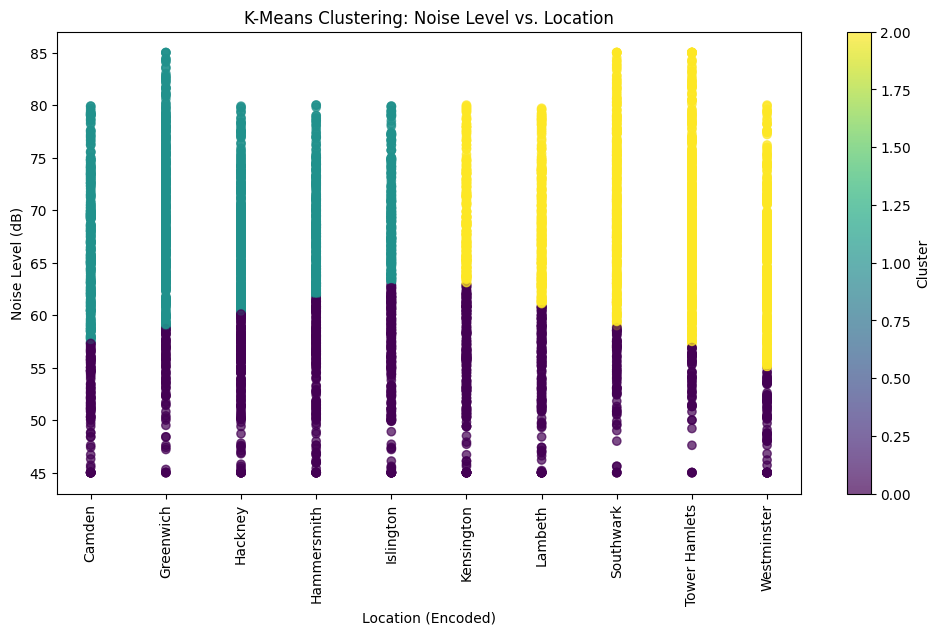

In [21]:
# Scatter plot to visualize clusters
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['Location_Num'], df['Noise Level (dB)'], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Cluster")
plt.xlabel("Location (Encoded)")
plt.ylabel("Noise Level (dB)")
plt.title("K-Means Clustering: Noise Level vs. Location")
plt.xticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=90)
plt.show()

In [22]:
# Encode 'Time of Day' as numerical labels
label_encoder = LabelEncoder()
df['Time_Num'] = label_encoder.fit_transform(df['Time of Day'])

In [23]:
# Select relevant features for clustering
X = df[['Time_Num', 'Noise Level (dB)']]

# Scale the Noise Level for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering with a chosen number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

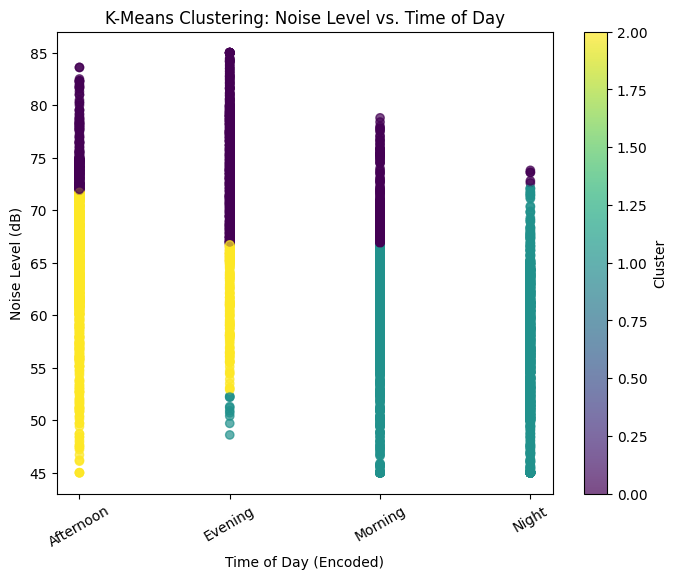

In [24]:
# Scatter plot to visualize clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Time_Num'], df['Noise Level (dB)'], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Cluster")
plt.xlabel("Time of Day (Encoded)")
plt.ylabel("Noise Level (dB)")
plt.title("K-Means Clustering: Noise Level vs. Time of Day")

# Replace x-axis ticks with actual time labels
plt.xticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=30)
plt.show()
